<a href="https://www.kaggle.com/code/williamross94/bike-share-case-study?scriptVersionId=111885981" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Bike-Share Case Study**

**Table of contents**
* [1. Ask ](#section-one)
* [2. Prepare ](#section-two)
* [3. Process ](#section-three)
* [4. Analyze](#section-four)
* [5. Share ](#section-five)
* [6. Act](#section-six)

<a id="introduction"></a> <br>
## **Scenario**

You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director
of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore,
your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights,
your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives
must approve your recommendations, so they must be backed up with compelling data insights and professional data
visualizations.

### **Stakeholders**

**Lily Moreno:** The director of marketing and your manager. Moreno is responsible for the development of campaigns
and initiatives to promote the bike-share program. These may include email, social media, and other channels.


**Cyclistic executive team:** The notoriously detail-oriented executive team will decide whether to approve the
recommended marketing program.

**Cyclistic marketing analytics team:** A team of data analysts who are responsible for collecting, analyzing, and
reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy
learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic
achieve them.

<a id="section-one"></a>
# 1. Ask


**Primary Guiding Question:**  How do annual members and casual riders use Cyclistic bikes
differently?

**Other Guiding Questions:**

 Why would casual riders buy Cyclistic annual memberships?
 
 How can Cyclistic use digital media to influence casual riders to become members?
 

 **Business Task:**
 
Design marketing strategies aimed at converting casual riders into annual members. Use the marketing analyst team to better understand how annual members and casual riders differ, why
casual riders would buy a membership?

<a id="section-two"></a>
# 2. Prepare


* The data's origin is from a Chicago based bikeshare company named DIVY. However for this case study the name has been changed to the fictional name Cyclistic.
* The data has been provided by [Motivate International Inc](https://divvy-tripdata.s3.amazonaws.com/index.html) under this ([license](https://ride.divvybikes.com/data-license-agreement)).
* 12 months of data was used to conduct this case study. It ranged from August 2021 to July 2022.

<a id="section-three"></a>
# 3. Process


In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#searching for relevant csv files

import glob
glob.glob('/kaggle/input/ride-share-data/Trip_data2/*.csv')

['/kaggle/input/ride-share-data/Trip_data2/202110-divvy-tripdata.csv',
 '/kaggle/input/ride-share-data/Trip_data2/202109-divvy-tripdata.csv',
 '/kaggle/input/ride-share-data/Trip_data2/202111-divvy-tripdata.csv',
 '/kaggle/input/ride-share-data/Trip_data2/202202-divvy-tripdata.csv',
 '/kaggle/input/ride-share-data/Trip_data2/202203-divvy-tripdata.csv',
 '/kaggle/input/ride-share-data/Trip_data2/202205-divvy-tripdata.csv',
 '/kaggle/input/ride-share-data/Trip_data2/202206-divvy-tripdata.csv',
 '/kaggle/input/ride-share-data/Trip_data2/202108-divvy-tripdata.csv',
 '/kaggle/input/ride-share-data/Trip_data2/202201-divvy-tripdata.csv',
 '/kaggle/input/ride-share-data/Trip_data2/202204-divvy-tripdata.csv',
 '/kaggle/input/ride-share-data/Trip_data2/202112-divvy-tripdata.csv',
 '/kaggle/input/ride-share-data/Trip_data2/202207-divvy-tripdata.csv']

In [2]:
# Go through the 12 csv files with for loop and append to list combined_df

combined_df = []

for file in glob.glob('/kaggle/input/ride-share-data/Trip_data2/*.csv'):
    print(f' file: {file}')
    df = pd.read_csv(file)
    combined_df.append(df)

 file: /kaggle/input/ride-share-data/Trip_data2/202110-divvy-tripdata.csv
 file: /kaggle/input/ride-share-data/Trip_data2/202109-divvy-tripdata.csv
 file: /kaggle/input/ride-share-data/Trip_data2/202111-divvy-tripdata.csv
 file: /kaggle/input/ride-share-data/Trip_data2/202202-divvy-tripdata.csv
 file: /kaggle/input/ride-share-data/Trip_data2/202203-divvy-tripdata.csv
 file: /kaggle/input/ride-share-data/Trip_data2/202205-divvy-tripdata.csv
 file: /kaggle/input/ride-share-data/Trip_data2/202206-divvy-tripdata.csv
 file: /kaggle/input/ride-share-data/Trip_data2/202108-divvy-tripdata.csv
 file: /kaggle/input/ride-share-data/Trip_data2/202201-divvy-tripdata.csv
 file: /kaggle/input/ride-share-data/Trip_data2/202204-divvy-tripdata.csv
 file: /kaggle/input/ride-share-data/Trip_data2/202112-divvy-tripdata.csv
 file: /kaggle/input/ride-share-data/Trip_data2/202207-divvy-tripdata.csv


In [3]:
# combined into one data frame

df = pd.concat(combined_df)

In [4]:
# drop any duplicate rows

df.drop_duplicates()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,41.889186,-87.638495,41.89,-87.63,member
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.93,-87.71,member
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.94,-87.72,member
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,NaN,NaN,NaN,NaN,41.920000,-87.690000,41.92,-87.69,member
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,NaN,NaN,NaN,NaN,41.890000,-87.710000,41.89,-87.69,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
823483,605787F70B3B9FD3,electric_bike,2022-07-09 08:32:15,2022-07-09 08:56:10,NaN,NaN,NaN,NaN,41.740000,-87.680000,41.75,-87.68,member
823484,F0EECBEE637DF028,electric_bike,2022-07-17 13:27:57,2022-07-17 13:33:09,NaN,NaN,NaN,NaN,41.870000,-87.660000,41.87,-87.68,member
823485,B8B091DC72DDAB9D,electric_bike,2022-07-17 14:51:37,2022-07-17 14:57:01,NaN,NaN,NaN,NaN,41.950000,-87.640000,41.95,-87.65,member
823486,B4D3FFCC1F3AF5EC,electric_bike,2022-07-28 13:41:50,2022-07-28 13:47:17,NaN,NaN,NaN,NaN,41.880000,-87.630000,41.87,-87.63,member


In [5]:
df.shape

(5901463, 13)

In [6]:
# Find total null values for each column

df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    860786
start_station_id      860784
end_station_name      919896
end_station_id        919896
start_lat                  0
start_lng                  0
end_lat                 5590
end_lng                 5590
member_casual              0
dtype: int64

<a id="section-four"></a>
# 4. Analyze

**Main objective for analysis:**
* Create a column for the total length of time riders used the bikes

* Create a column for the month

* Create a column for the name of the weekday

* Create a column for the hour(start time)

* Create a column for the hour(end time)

* Find the percentage of member and casual riders 

* Find the percentage of each bike type used 

* Find the percentage of member_type and rideable_type pairs

In [7]:
#Calculate the total ride time (ended_at - started_at)


date_format = "%Y-%m-%d %H:%M:%S"

start_time = []
end_time = []
total = []

#iterate over the 'started_at' column, convert using date_format, and appending to list start_time

for col in df['started_at']:
    time1 = datetime.strptime(col, date_format)
    start_time.append(time1)

#iterate over the 'ended_at' column, convert using date_format, and appending to list end_time    
    
for col in df['ended_at']:
    time2 = datetime.strptime(col, date_format)
    end_time.append(time2)  

#subtracting start_time list values from end_time list values      
    
for i in range(5901463):
    time_diff = end_time[i] - start_time[i]
    total.append(time_diff)

#convert to numpy array 

total_time = np.asarray(total)

# Add column 'total_ride_time' to dataframe

df['total_ride_time'] = total_time.tolist()

In [8]:
# total_ride_time column created

df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,total_ride_time
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,41.889186,-87.638495,41.89,-87.63,member,0 days 00:03:08
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.93,-87.71,member,0 days 00:01:37
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.94,-87.72,member,0 days 00:07:47
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,NaN,NaN,NaN,NaN,41.920000,-87.690000,41.92,-87.69,member,0 days 00:01:15
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,NaN,NaN,NaN,NaN,41.890000,-87.710000,41.89,-87.69,member,0 days 00:08:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823483,605787F70B3B9FD3,electric_bike,2022-07-09 08:32:15,2022-07-09 08:56:10,NaN,NaN,NaN,NaN,41.740000,-87.680000,41.75,-87.68,member,0 days 00:23:55
823484,F0EECBEE637DF028,electric_bike,2022-07-17 13:27:57,2022-07-17 13:33:09,NaN,NaN,NaN,NaN,41.870000,-87.660000,41.87,-87.68,member,0 days 00:05:12
823485,B8B091DC72DDAB9D,electric_bike,2022-07-17 14:51:37,2022-07-17 14:57:01,NaN,NaN,NaN,NaN,41.950000,-87.640000,41.95,-87.65,member,0 days 00:05:24
823486,B4D3FFCC1F3AF5EC,electric_bike,2022-07-28 13:41:50,2022-07-28 13:47:17,NaN,NaN,NaN,NaN,41.880000,-87.630000,41.87,-87.63,member,0 days 00:05:27


In [9]:
# Data types of each column

df.dtypes

ride_id                        object
rideable_type                  object
started_at                     object
ended_at                       object
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
total_ride_time       timedelta64[ns]
dtype: object

In [10]:
#convert the total_ride_time column (timedelta) into seconds

df["ride_time(seconds)"] = df["total_ride_time"]/np.timedelta64(1, 's')

In [11]:
#convert the date into "day of the week (ex.Wednesday)"

date_format = "%Y-%m-%d %H:%M:%S"

week_day = []

for day in df["started_at"]:
    d = datetime.strptime(day, date_format).strftime('%A')
    week_day.append(d)

day = np.asarray(week_day)

df["day_of_week"] = day.tolist()

In [12]:
# day_of_week column created 

df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,total_ride_time,ride_time(seconds),day_of_week
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,41.889186,-87.638495,41.89,-87.63,member,0 days 00:03:08,188.0,Friday
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.93,-87.71,member,0 days 00:01:37,97.0,Thursday
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.94,-87.72,member,0 days 00:07:47,467.0,Saturday
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,NaN,NaN,NaN,NaN,41.920000,-87.690000,41.92,-87.69,member,0 days 00:01:15,75.0,Saturday
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,NaN,NaN,NaN,NaN,41.890000,-87.710000,41.89,-87.69,member,0 days 00:08:16,496.0,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823483,605787F70B3B9FD3,electric_bike,2022-07-09 08:32:15,2022-07-09 08:56:10,NaN,NaN,NaN,NaN,41.740000,-87.680000,41.75,-87.68,member,0 days 00:23:55,1435.0,Saturday
823484,F0EECBEE637DF028,electric_bike,2022-07-17 13:27:57,2022-07-17 13:33:09,NaN,NaN,NaN,NaN,41.870000,-87.660000,41.87,-87.68,member,0 days 00:05:12,312.0,Sunday
823485,B8B091DC72DDAB9D,electric_bike,2022-07-17 14:51:37,2022-07-17 14:57:01,NaN,NaN,NaN,NaN,41.950000,-87.640000,41.95,-87.65,member,0 days 00:05:24,324.0,Sunday
823486,B4D3FFCC1F3AF5EC,electric_bike,2022-07-28 13:41:50,2022-07-28 13:47:17,NaN,NaN,NaN,NaN,41.880000,-87.630000,41.87,-87.63,member,0 days 00:05:27,327.0,Thursday


In [13]:
df.dtypes

ride_id                        object
rideable_type                  object
started_at                     object
ended_at                       object
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
total_ride_time       timedelta64[ns]
ride_time(seconds)            float64
day_of_week                    object
dtype: object

In [14]:
# min shows that their are negative values

df["ride_time(seconds)"].describe()

count    5.901463e+06
mean     1.193376e+03
std      8.879109e+03
min     -8.245000e+03
25%      3.700000e+02
50%      6.570000e+02
75%      1.189000e+03
max      2.497750e+06
Name: ride_time(seconds), dtype: float64

In [15]:
# Reomoving negative values 

negative_values = df[df["ride_time(seconds)"] < 0].index
df.drop(negative_values, inplace=True)

In [16]:
df["ride_time(seconds)"].describe()

count    5.900186e+06
mean     1.193454e+03
std      8.879945e+03
min      0.000000e+00
25%      3.700000e+02
50%      6.570000e+02
75%      1.189000e+03
max      2.497750e+06
Name: ride_time(seconds), dtype: float64

In [17]:
# Creating a month column

months = {
    "01": "January",
    "02": "February",
    "03": "March",
    "04": "April",
    "05": "May",
    "06": "June",
    "07": "July",
    "08": "August",
    "09": "September",
    "10": "October",
    "11": "November",
    "12" : "December"
    
}


Months = []

for date in df["ended_at"]:
    a, b, c = date.split("-")
    month_word = months.get(b)
    Months.append(month_word)
    
m_w = np.asarray(Months)

df["Month"] = m_w.tolist()

In [18]:
# Creating a start hour column

hour = []

for date in df["started_at"]:
    if date[11] == "0":
        hour.append(date[12])
    else:
        hour.append(date[11:13])

h = np.asarray(hour)

df["Hour(start_time)"] = h.tolist()   

In [19]:
# Creating a end hour column

hour = []

for date in df["ended_at"]:
    if date[11] == "0":
        hour.append(date[12])
    else:
        hour.append(date[11:13])

h = np.asarray(hour)

df["Hour(end_time)"] = h.tolist() 

In [20]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,total_ride_time,ride_time(seconds),day_of_week,Month,Hour(start_time),Hour(end_time)
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,41.889186,-87.638495,41.89,-87.63,member,0 days 00:03:08,188.0,Friday,October,12,12
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.93,-87.71,member,0 days 00:01:37,97.0,Thursday,October,9,9
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.94,-87.72,member,0 days 00:07:47,467.0,Saturday,October,16,16
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,NaN,NaN,NaN,NaN,41.920000,-87.690000,41.92,-87.69,member,0 days 00:01:15,75.0,Saturday,October,16,16
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,NaN,NaN,NaN,NaN,41.890000,-87.710000,41.89,-87.69,member,0 days 00:08:16,496.0,Wednesday,October,23,23


In [21]:
# Finding the average value of member_casual ride_time(seconds)

df.groupby("member_casual")["ride_time(seconds)"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,2521684.0,1752.79,13427.94,0.0,491.0,864.0,1582.0,2497750.0
member,3378502.0,775.97,1649.13,0.0,313.0,541.0,940.0,93594.0


**The average casual user rode for 1752.79 seconds per session (29.21 minutes)**


**The average member user rode for 775.97 seconds per session (12.93 minutes)**


In [22]:
df["rideable_type"].value_counts()

classic_bike     3054969
electric_bike    2618541
docked_bike       226676
Name: rideable_type, dtype: int64

In [23]:
# Calculating the percentage of each bike type

classic_bike = 3054969
electric_bike = 2618541
docked_bike = 226676

total = classic_bike + electric_bike + docked_bike
classic = round((classic_bike / total) * 100,2)
electric = round((electric_bike / total) * 100,2)
docked = round((docked_bike / total) * 100,2)

print(f"classic_bike : {classic}%")
print(f"electric_bike : {electric}%")
print(f"docked_bike : {docked}%")

classic_bike : 51.78%
electric_bike : 44.38%
docked_bike : 3.84%


**51.78% of riders used classic bikes**

**44.38% of riders used electric bikes** 

**3.84% of riders used docked bikes** 


In [24]:
df["member_casual"].value_counts()

member    3378502
casual    2521684
Name: member_casual, dtype: int64

In [25]:
# Calculating the percentage of each member type

member = 3378502
casual = 2521684
total = member + casual
members = round((member / total) * 100,2)
casuals = round((casual / total) * 100,2)

print(f"member : {members}%")
print(f"casual : {casuals}%")

member : 57.26%
casual : 42.74%


**57.26% of riders were members**

**42.74% of riders were casual**

In [26]:
# member_type and rideable_type pairs

df_ridetype_member = df.groupby(['rideable_type', 'member_casual']).size().unstack(fill_value=0)
df_ridetype_member

member_casual,casual,member
rideable_type,,
classic_bike,1132639,1922330
docked_bike,226676,0
electric_bike,1162369,1456172


In [27]:
classic_bike_member = 1922330
electric_bike_member = 1456172
docked_bike_member = 0
classic_bike_casual = 1132639
electric_bike_casual = 1162369
docked_bike_casual = 226676

In [28]:
total = classic_bike_casual + classic_bike_member + electric_bike_casual + electric_bike_member + docked_bike_casual + docked_bike_member
cb_casual = round((classic_bike_casual / total) * 100,2)
eb_casual = round((electric_bike_casual / total) * 100,2)
db_casual = round((docked_bike_casual / total) * 100,2)
cb_member = round((classic_bike_member / total) * 100,2)
eb_member = round((electric_bike_member / total) * 100,2)
db_member = round((docked_bike_member / total) * 100,2)

print(f"classic_bike_casual : {cb_casual}%")
print(f"electric_bike_casual : {eb_casual}%")
print(f"docked_bike_casual : {db_casual}%")
print(f"classic_bike_member : {cb_member}%")
print(f"electric_bike_member : {eb_member}%")
print(f"docked_bike_member : {db_member}%")

classic_bike_casual : 19.2%
electric_bike_casual : 19.7%
docked_bike_casual : 3.84%
classic_bike_member : 32.58%
electric_bike_member : 24.68%
docked_bike_member : 0.0%


([<matplotlib.patches.Wedge at 0x7f0d37ecea50>,
 [Text(0.9058858833309515, 0.6239958063815029, 'classic_bike_casual'),
  Text(-0.276904604659854, 1.0645768360800314, 'electric_bike_casual'),
  Text(-0.9220353255983276, 0.5998757024157473, 'docked_bike_casual'),
  Text(-0.9276481366057915, -0.5911589757855353, 'classic_bike_member'),
  Text(0.7855973756505688, -0.7699589361588963, 'electric_bike_member'),
  Text(1.0999999999999808, -2.0597886570014373e-07, 'docked_bike_member')],
 [Text(0.4941195727259735, 0.3403613489353651, '19%'),
  Text(-0.15103887526901127, 0.5806782742254716, '20%'),
  Text(-0.5029283594172695, 0.32720492859040756, '4%'),
  Text(-0.505989892694068, -0.32245035042847375, '33%'),
  Text(0.42850765944576474, -0.4199776015412161, '25%'),
  Text(0.5999999999999894, -1.1235210856371475e-07, '0%')])

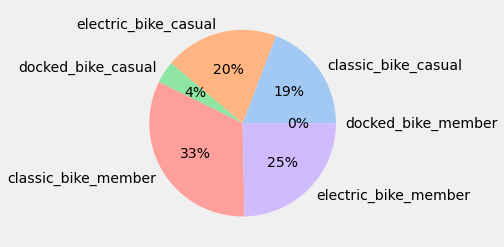

In [29]:
# Create pie chart showing (member_type)-(rideable_type) pairs

data = [19.2, 19.7, 3.84, 32.58, 24.68, 0]
labels = ['classic_bike_casual', 'electric_bike_casual', 'docked_bike_casual', 'classic_bike_member', 'electric_bike_member', 'docked_bike_member']

#=Seaborn color palette 
colors = sns.color_palette('pastel')

#create the pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')

<a id="section-five"></a>
# 5. Share


This project's tableau visualizations can be found here: [click here](https://public.tableau.com/views/Bike-ShareCaseStudy_16631858139840/Story1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

<a id="section-six"></a>
# 6. Act

**Key findings:**
* The average casual user rode for 29.21 minutes compared to members users who rode for 12.93 minutes.


* Casual user's start and end locations were more densely populated near the shorline. However, member's were more evenly distrubited among locations and went further inland.


* Streeter Dr and Grand Ave was the most popular station for casual users. Casual riders had 3.6 times more users than members in this location.


* Casual user's were more likely to ride on weekends than weekdays.


* Member's were more consistant in riding througout the week.


* The summer month's were most popular among casual riders.


* the classic bike was the most popular rideable type for members. While casual rider's had about an even preference for electric and classic bikes.

**Recommendations**

1. Provide a limited-time offer during the summer months, which gives those who sign up for annual memberships the first year at a discounted price. Focus on the stations with a high population of casual riders such as Streeter Dr and Grand Ave.

2. Since casual users are more likely to ride on the weekends, provide memberships that give perks such as unlimited ride times on the weekends or some type of point reward system that gives bonuses to weekend users.

3. Prioritize putting more bike docking stations along the shoreline where casual riders frequent. In order the give greater accessibility.